### Append Path

In [33]:
import sys

sys.path.append("..")

%reload_ext autoreload
%autoreload 2

### Load Data

In [34]:
import pandas as pd

df = pd.read_csv("../data/processed/feature_engineered_data.csv")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18296\3085591209.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/feature_engineered_data.csv")


### Train Test Split

In [35]:
from src.modeling import split_data

X_train, X_test, y_train, y_test = split_data(
    df, target_col="SolarGeneration", test_size=0.2
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Filtered to daylight hours: 709590 -> 665614 rows (93.8%)
Created CapacityFactor target (SolarGeneration / kWp)
Training on CapacityFactor (multiply predictions by kWp to get kWh)
X_train shape: (532491, 26)
X_test shape: (133123, 26)


### Model Training

In [36]:
from src.modeling import train_model

model = train_model(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits

Best Params: {'subsample_freq': 1, 'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'num_leaves': 50, 'n_estimators': 500, 'min_split_gain': 0.1, 'min_child_samples': 50, 'max_depth': 15, 'learning_rate': 0.005, 'colsample_bytree': 0.9}
Best CV R2 Score: 0.7196

Training Complete.


### Model Evaluation

In [37]:
from src.modeling import evaluate_model

preds = evaluate_model(model, X_test, y_test)

MAE (Mean Absolute Error): 0.0353 kWh
RMSE (Root Mean Sq Error): 0.0545 kWh
R2 Score: 0.8141


### Visualization

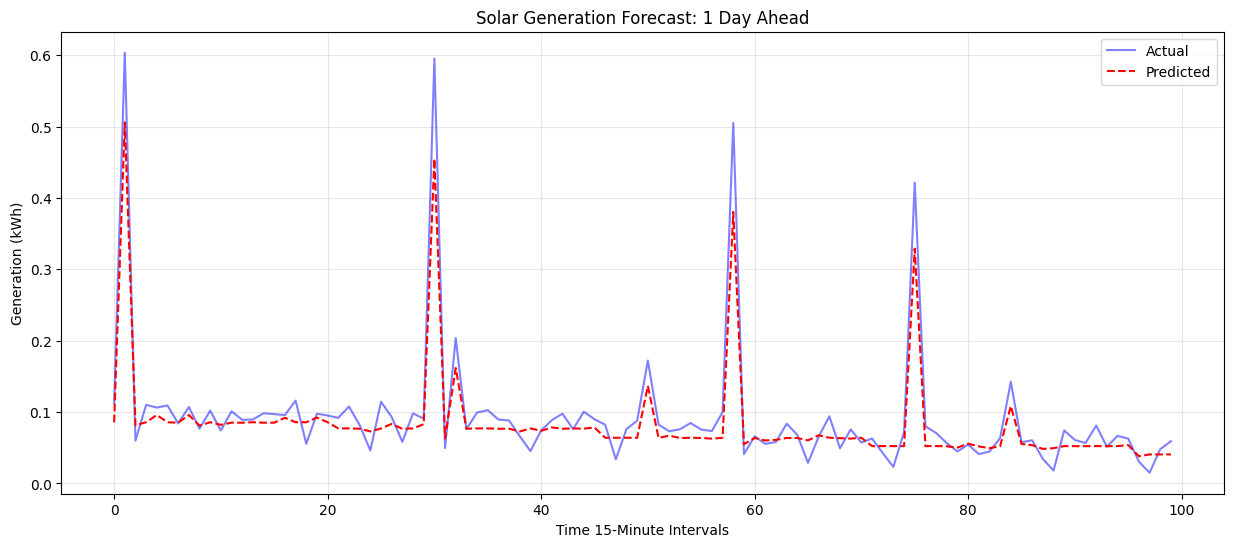

In [38]:
import matplotlib.pyplot as plt

results = pd.DataFrame({"Actual": y_test, "Predicted": preds})

plt.figure(figsize=(15, 6))
plt.plot(results["Actual"].values[:100], label="Actual", color="blue", alpha=0.5)
plt.plot(
    results["Predicted"].values[:100], label="Predicted", color="red", linestyle="--"
)
plt.title("Solar Generation Forecast: 1 Day Ahead")
plt.xlabel("Time 15-Minute Intervals")
plt.ylabel("Generation (kWh)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Feature Importance

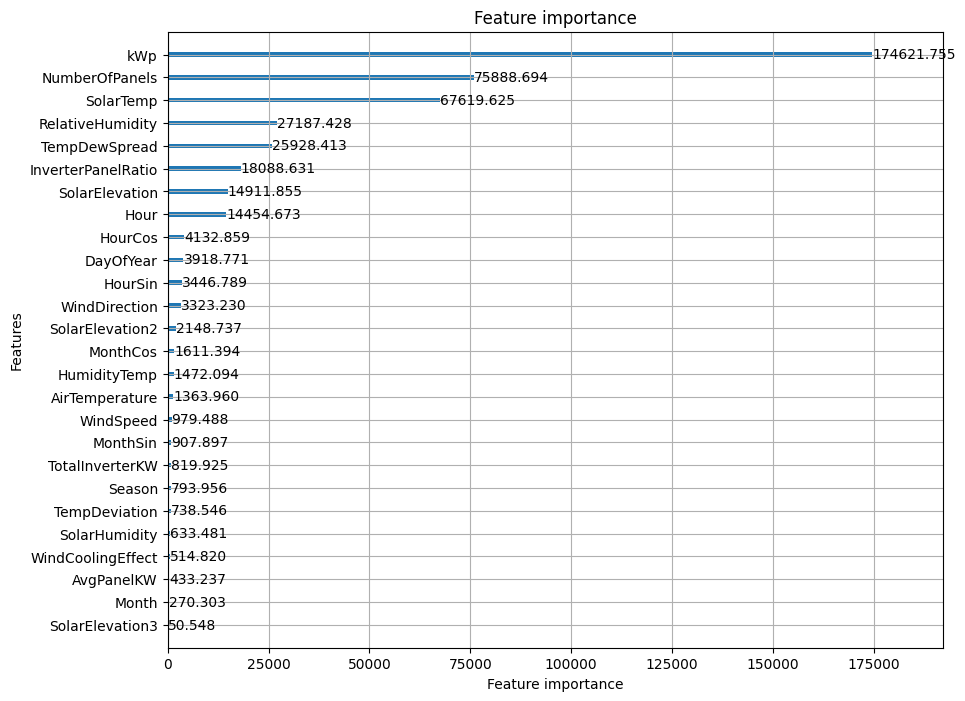

In [39]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(model, ax=ax, max_num_features=30, importance_type="gain")
plt.show()

### Save Model

In [40]:
from src.modeling import save_model

save_model(model, "../models/solar_lightgbm.pkl")

Model saved to ../models/solar_lightgbm.pkl
